In [139]:
import obspy
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [140]:
id1 = 520320
id2 = 520323

In [3]:
# Get original events
file = 'endquakes_2017.xml'
cat = obspy.core.event.read_events(file)

In [151]:
# Pull in their waveforms
path= 'sep2017_mseed/'
fid1 = path+str(id1)+'.mseed'
fid2 = path+str(id2)+'.mseed'
st1 = obspy.read(fid1)
st2 = obspy.read(fid2)

In [152]:
ev1 = [p for p in cat if str(p.resource_id)[-6:] == str(id1)][0]
ev2 = [p for p in cat if str(p.resource_id)[-6:] == str(id2)][0]

pick1 = ev1.picks[2]
pick2 = ev2.picks[2]

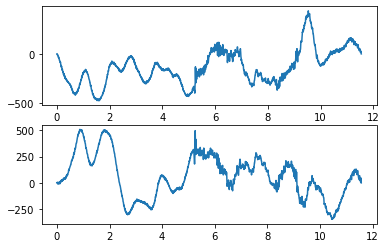

In [153]:
tr1 = st1.select(station=pick1.waveform_id.station_code,channel=pick1.waveform_id.channel_code)[0].detrend()
tr2 = st2.select(station=pick2.waveform_id.station_code,channel=pick2.waveform_id.channel_code)[0].detrend()
tr1.filter('bandpass',freqmin=5,freqmax=20)
tr2.filter('bandpass',freqmin=5,freqmax=20)
fig,ax=plt.subplots(2,1)
ax[0].plot(tr1.times(),tr1.data)
ax[1].plot(tr2.times(),tr2.data)

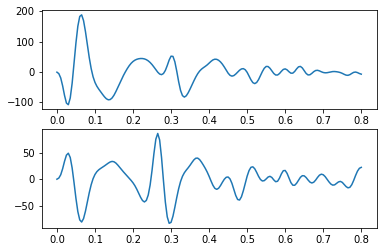

In [154]:
# Just a seismogram around the P-wave, unfiltered:
tr1_trim = tr1.trim(starttime=pick1.time-0.2,endtime=pick1.time+0.6)
tr2_trim = tr2.trim(starttime=pick2.time-0.2,endtime=pick2.time+0.6)

#tr1_trim.normalize()
#tr2_trim.normalize()
fig,ax=plt.subplots(2,1)
ax[0].plot(tr1_trim.times(),tr1_trim.data)
ax[1].plot(tr2_trim.times(),tr2_trim.data)

8
64708.12989183075
0.04
NV.ENWF..HHZ | 2017-09-16T10:29:18.845000Z - 2017-09-16T10:29:19.645000Z | 200.0 Hz, 161 samples


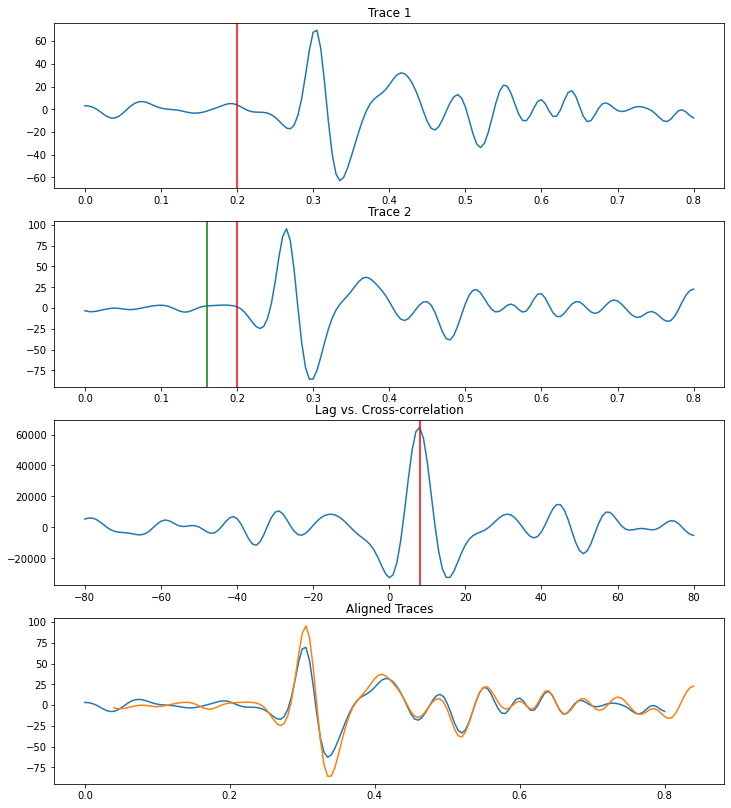

In [150]:
# See which sample those best align on

# Slide the second trace through the first, cross correlate, see which lag produces the highest cross correlation
samp_rate = tr1_trim.stats.sampling_rate
lags = scipy.signal.correlation_lags(tr1_trim.stats.npts,tr2_trim.stats.npts,mode='same')
corr = scipy.signal.correlate(tr1_trim.data,tr2_trim.data,mode='same')
max_ind = np.argmax(corr)
lag = lags[max_ind]

# What time does that lag correspond to?
fig,ax=plt.subplots(4,1,figsize=[12,14])
ax[0].plot(tr1_trim.times(),tr1_trim.data)
ax[0].axvline(0.2,color='r')
ax[0].set_title('Trace 1')
ax[1].plot(tr2_trim.times(),tr2_trim.data)
ax[1].axvline(0.2,color='r')
ax[1].axvline(0.2-(lag/samp_rate),color='g')
ax[1].set_title('Trace 2')
ax[2].plot(lags,corr)
ax[2].axvline(lags[max_ind],color='r')
ax[2].set_title('Lag vs. Cross-correlation')
print(lag)
print(corr[max_ind])
ax[3].plot(tr1_trim.times(),tr1_trim.data)
ax[3].plot(tr2_trim.times()+lag/samp_rate,tr2_trim.data)
print(lag/samp_rate)
ax[3].set_title('Aligned Traces')
print(tr2_trim)

#### Can be done the same way with built-in obspy functions

In [147]:
xcor = obspy.signal.cross_correlation.correlate(tr1_trim,tr2_trim,100)
shift,value = obspy.signal.cross_correlation.xcorr_max(xcor)
print(shift)

8
